In [386]:
import cv2
import numpy as np
import pandas as pd
import time
import os

Task 1.1 + 1.2: PRE-PROCESSING + FEATURE SELECTION OF TRAINING DATA

In [387]:
# Build paths and check validity

dataLoc = os.path.join("dataset")
trainDataPath = os.path.join(dataLoc, "train.csv")
testDataPath = os.path.join(dataLoc, "test.csv")
assert os.path.exists(trainDataPath), "Train dataset path does not exist: {}".format(trainDataPath)
assert os.path.exists(testDataPath), "Test dataset path does not exist: {}".format(testDataPath)

In [470]:
# Load raw training and testing dataset

trainDF = pd.read_csv(trainDataPath)
testDF = pd.read_csv(testDataPath)

# Print info and describe for both training and testing dataset
print("=" * 90)
print (" " * 30, "TRAINING DATASET INFORMATION")
print("=" * 90)
print(trainDF.info())
print("-" * 30, "TRAINING SAMPLE", "-" * 30)
print(trainDF.head())
print("-" * 90)
print(trainDF.describe())
print("=" * 90)
print (" " * 30, "TESTING DATASET INFORMATION")
print("=" * 90)
print(testDF.info())
print("-" * 30, "TESTING SAMPLE", "-" * 30)
print(testDF.head())
print("-" * 90)
print(testDF.describe())
print("=" * 90)


                               TRAINING DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
------------------------------ TRAINING SAMPLE ------------------------------
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1     

In [389]:
# Initial Correlation of training data
print("Initial Correlation between features")
trainDF.corr()

Initial Correlation between features


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


The dataset has unfilled values. We will first fill up or drop the sample points or the column itself based on importance of the features. The dataset has total 891 sample points. So, the columns that need corrections (unfilled values) are below:
Data Fill I: Embarked: 889/891 available=>
    - As data is not available for only 2 sample points and data structure is not integer, we will directly use mode of the column to fill the missing values
    
    
Age: 714/891 available=>
2. Cabin: 204/891 available=>
3. Embarked: 889/891 available=>
    - As data is not available for only 2 sample points and data structure is not integer, we will directly use mode of the column to fill the missing values

In [390]:
print("Filling missing values with: ", trainDF['Embarked'].mode()[0])
trainDF['Embarked'].fillna(trainDF['Embarked'].mode()[0], inplace=True)
print(trainDF.info())

Filling missing values with:  S
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Embarked column is now filled with all 891 values.
Data Fill II: Cabin: 204/891 available
    - As there is very less data available to do any type of interpolation, we will be dropping this column from training and testing dataframe

In [391]:
trainDF.drop(columns=["Cabin"], inplace=True)
testDF.drop(columns=["Cabin"], inplace=True)
print(trainDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None


Data Fill III: Age: 714/891 available =>
    - We can either fill the missing values with the mean of training set
    - Or, As our goal is to predict survival, age does play an important role. Ex: older people have less chance of survival as compared to younger people because of lack of mobility
    - So, I propose another way to get a better age estimate by dividing the training set based on PClass or Fare. This is based on assumption that older people have better expending potential in general and they also look for better class for luxury
    
I checked the correlation between Pclass <-> Survived and Fare <-> Survived to decide which is a better tool to estimate age.
abs(Corr(PClass <-> Survived)) = 0.3385
abs(Corr(Fare <-> Survived)) = 0.2573

I will fill Age values with the mean age of respective class for missing values

In [392]:
trainMeanAgeDict = {
    1: float(int(trainDF.loc[trainDF['Pclass'] == 1]['Age'].mean())),
    2: float(int(trainDF.loc[trainDF['Pclass'] == 2]['Age'].mean())),
    3: float(int(trainDF.loc[trainDF['Pclass'] == 3]['Age'].mean()))
}
testMeanAgeDict = {
    1: float(int(testDF.loc[trainDF['Pclass'] == 1]['Age'].mean())),
    2: float(int(testDF.loc[trainDF['Pclass'] == 2]['Age'].mean())),
    3: float(int(testDF.loc[trainDF['Pclass'] == 3]['Age'].mean()))
}

print("Class wise mean age for training data: ", trainMeanAgeDict)
print("Class wise mean age for testing data: ", testMeanAgeDict)

trainDF['Age'].fillna(-1, inplace=True)
trainDF.loc[((trainDF['Pclass'] == 1) & (trainDF['Age'] == -1)), 'Age'] = trainMeanAgeDict[1]
trainDF.loc[((trainDF['Pclass'] == 2) & (trainDF['Age'] == -1)), 'Age'] = trainMeanAgeDict[2]
trainDF.loc[((trainDF['Pclass'] == 3) & (trainDF['Age'] == -1)), 'Age'] = trainMeanAgeDict[3]

testDF['Age'].fillna(-1, inplace=True)
testDF.loc[((testDF['Pclass'] == 1) & (testDF['Age'] == -1)), 'Age'] = testMeanAgeDict[1]
testDF.loc[((testDF['Pclass'] == 2) & (testDF['Age'] == -1)), 'Age'] = testMeanAgeDict[2]
testDF.loc[((testDF['Pclass'] == 3) & (testDF['Age'] == -1)), 'Age'] = testMeanAgeDict[3]

print (trainDF.info())
print (testDF.info())


Class wise mean age for training data:  {1: 38.0, 2: 29.0, 3: 25.0}
Class wise mean age for testing data:  {1: 30.0, 2: 32.0, 3: 29.0}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  

There are some colums which are a factor in survival but not in numeral form to account in our algorithms. So, now we will implement some data translation techniques to convert 'Sex' and 'Embarked' into numeral/categorical columns

In [393]:
# Converting Sex column into categorical dataType: Male=0, Female=1
from pandas.api.types import CategoricalDtype

trainDF.loc[(trainDF['Sex'] == False), 'Sex'] = 0
trainDF.loc[(trainDF['Sex'] == True), 'Sex'] = 1
sex_dtype = CategoricalDtype(categories=[0, 1])
trainDF['Sex'].astype(dtype=sex_dtype)
trainDF['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

Experiments with embarked column:

Here I have tried 2 approaches
1. Assigning 0,1,2 to each embarked options having the best correlation
2. Having 3 new boolean columns for each of the port of embarkation

Below are the results of the experiments

In [394]:
def replacedEmbarkedDF(df, sVal, cVal, qVal):
#     print (df.head())
    tempDF = df.copy()
    tempDF['Embarked'].replace("S", sVal, inplace=True)
#     print (type(tempDF))
    tempDF['Embarked'].replace("C", cVal, inplace=True)
    tempDF['Embarked'].replace("Q", qVal, inplace=True)
    return tempDF

def addEmbarkedColumns(df):
    tempDF = df.copy()
    sEmbarked = [False for i in range(891)]
    cEmbarked = [False for i in range(891)]
    qEmbarked = [False for i in range(891)]
    
    tempDF['sEmbarked'] = sEmbarked
    tempDF['cEmbarked'] = cEmbarked
    tempDF['qEmbarked'] = qEmbarked
    
    tempDF.loc[tempDF.Embarked == "S", 'sEmbarked'] = True
    tempDF.loc[tempDF.Embarked == "C", 'cEmbarked'] = True
    tempDF.loc[tempDF.Embarked == "Q", 'qEmbarked'] = True
    
    tempDF.drop(columns=['Embarked'],inplace=True)
    return tempDF
    

def runEmbarkedExperiments(df):
    maxVal = 0
    maxExp = {}
    bestDF = None
    experiments = [{"sVal": 0, "cVal": 1, "qVal": 2},
                   {"sVal": 2, "cVal": 1, "qVal": 0},
                   {"sVal": 1, "cVal": 0, "qVal": 2},
                   {"sVal": 1, "cVal": 2, "qVal": 3},
                   {"sVal": 3, "cVal": 2, "qVal": 1}]
    for exp in experiments:
#         print (exp)
        expDF = replacedEmbarkedDF(df, sVal=exp["sVal"], cVal=exp["cVal"], qVal=exp["qVal"])
        res = expDF.corr()
        if abs(res['Embarked']['Survived']) > abs(maxVal):
            maxVal = res['Embarked']['Survived']
            maxExp = exp
            bestDF = expDF.copy()
#         print(res)
#         print("=" * 80)
    print("Best integer values for Embarked: {}".format(maxExp))
    print("Correlation Score: {}".format(maxVal))
    return bestDF

In [303]:
bestEmbarkedDummy = runEmbarkedExperiments(trainDF)
separatedEmbarked = addEmbarkedColumns(trainDF)
resCategory = bestEmbarkedDummy.corr()
resSeparated = separatedEmbarked.corr()
separatedScores = [abs(resSeparated['Survived']['sEmbarked']),
                  abs(resSeparated['Survived']['cEmbarked']),
                  abs(resSeparated['Survived']['qEmbarked'])]
separatedScore = sum(separatedScores) / 3.0
print ("Numeral category wise best Corr(Survived <-> Embarked): ", abs(resCategory['Survived']['Embarked']))
print ("Separated category wise Corr score: ", separatedScore)

Best integer values for Embarked: {'sVal': 1, 'cVal': 0, 'qVal': 2}
Correlation Score: -0.12595276550243203
Numeral category wise best Corr(Survived <-> Embarked):  0.12595276550243203
Separated category wise Corr score:  0.10719117905763026


In [395]:
# Finalizing best category wise values for further analysis
trainDF = bestEmbarkedDummy.copy()

In [396]:
print(trainDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB
None


In [397]:
removeCols = ["PassengerId", "Name", "Ticket"]
trainDF.drop(columns=removeCols, inplace=True)
trainDF.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1


Task 1.3.1: LEARNING DECISION TREE MODEL

In [398]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
RANDOM_SEED = 7

np.random.seed(RANDOM_SEED)
classifierObj = DecisionTreeClassifier()
labels = trainDF['Survived']
trainDF.drop(columns=['Survived'], inplace=True)

train_X, test_X, train_Y, test_Y = train_test_split(trainDF, labels, test_size=0.15)

In [399]:
# Model fitter
classifierObj.fit(train_X, train_Y)
print("Train ACC: ", classifierObj.score(train_X, train_Y) * 100)
print("Test ACC: ", classifierObj.score(test_X, test_Y) * 100)

Train ACC:  98.28269484808455
Test ACC:  76.11940298507463


Task 1.3.2: FINE TUNING DECISION TREE MODEL

In [400]:
def fineTuner():
    criterionList = ['gini', 'entropy']
    maxDepthList = [1,2,3,4,5,6,7,8,9,10,None]
    minSamplesList = [4,3,2]
    maxFeatureList = [0.5,0.6,0.7,0.8,0.9,1.0,None, 'auto', 'sqrt', 'log2']
    bestModel = None
    bestScore = 0
    bestHyperParameters = {"criterion": None,
                           "maxDepth": None,
                           "minSampleSplit": None,
                           "maxFeature": None}
    
    for criteria in criterionList:
        for maxDepth in maxDepthList:
            for minSamples in minSamplesList:
                for maxFeatures in maxFeatureList:
                    model = DecisionTreeClassifier(criterion=criteria,
                                                  max_depth=maxDepth,
                                                  min_samples_split=minSamples,
                                                  max_features=maxFeatures)
                    model.fit(train_X, train_Y)
                    score = model.score(test_X, test_Y)
                    if score > bestScore:
                        bestModel = model
                        bestScore = score
                        bestHyperParameters["criterion"] = criteria
                        bestHyperParameters["maxDepth"] = maxDepth
                        bestHyperParameters["minSampleSplit"] = minSamples
                        bestHyperParameters["maxFeature"] = maxFeatures

    print ("Best Score: ", bestScore * 100)
    print ("Best Params: ", bestHyperParameters)
    return bestModel, bestHyperParameters, bestScore
                    
                    
    
    

In [401]:
model, paramDict, score = fineTuner()

Best Score:  83.5820895522388
Best Params:  {'criterion': 'gini', 'maxDepth': 5, 'minSampleSplit': 4, 'maxFeature': 'auto'}


Task 1.3.3: PLOT FINE-TUNED DECISION TREE

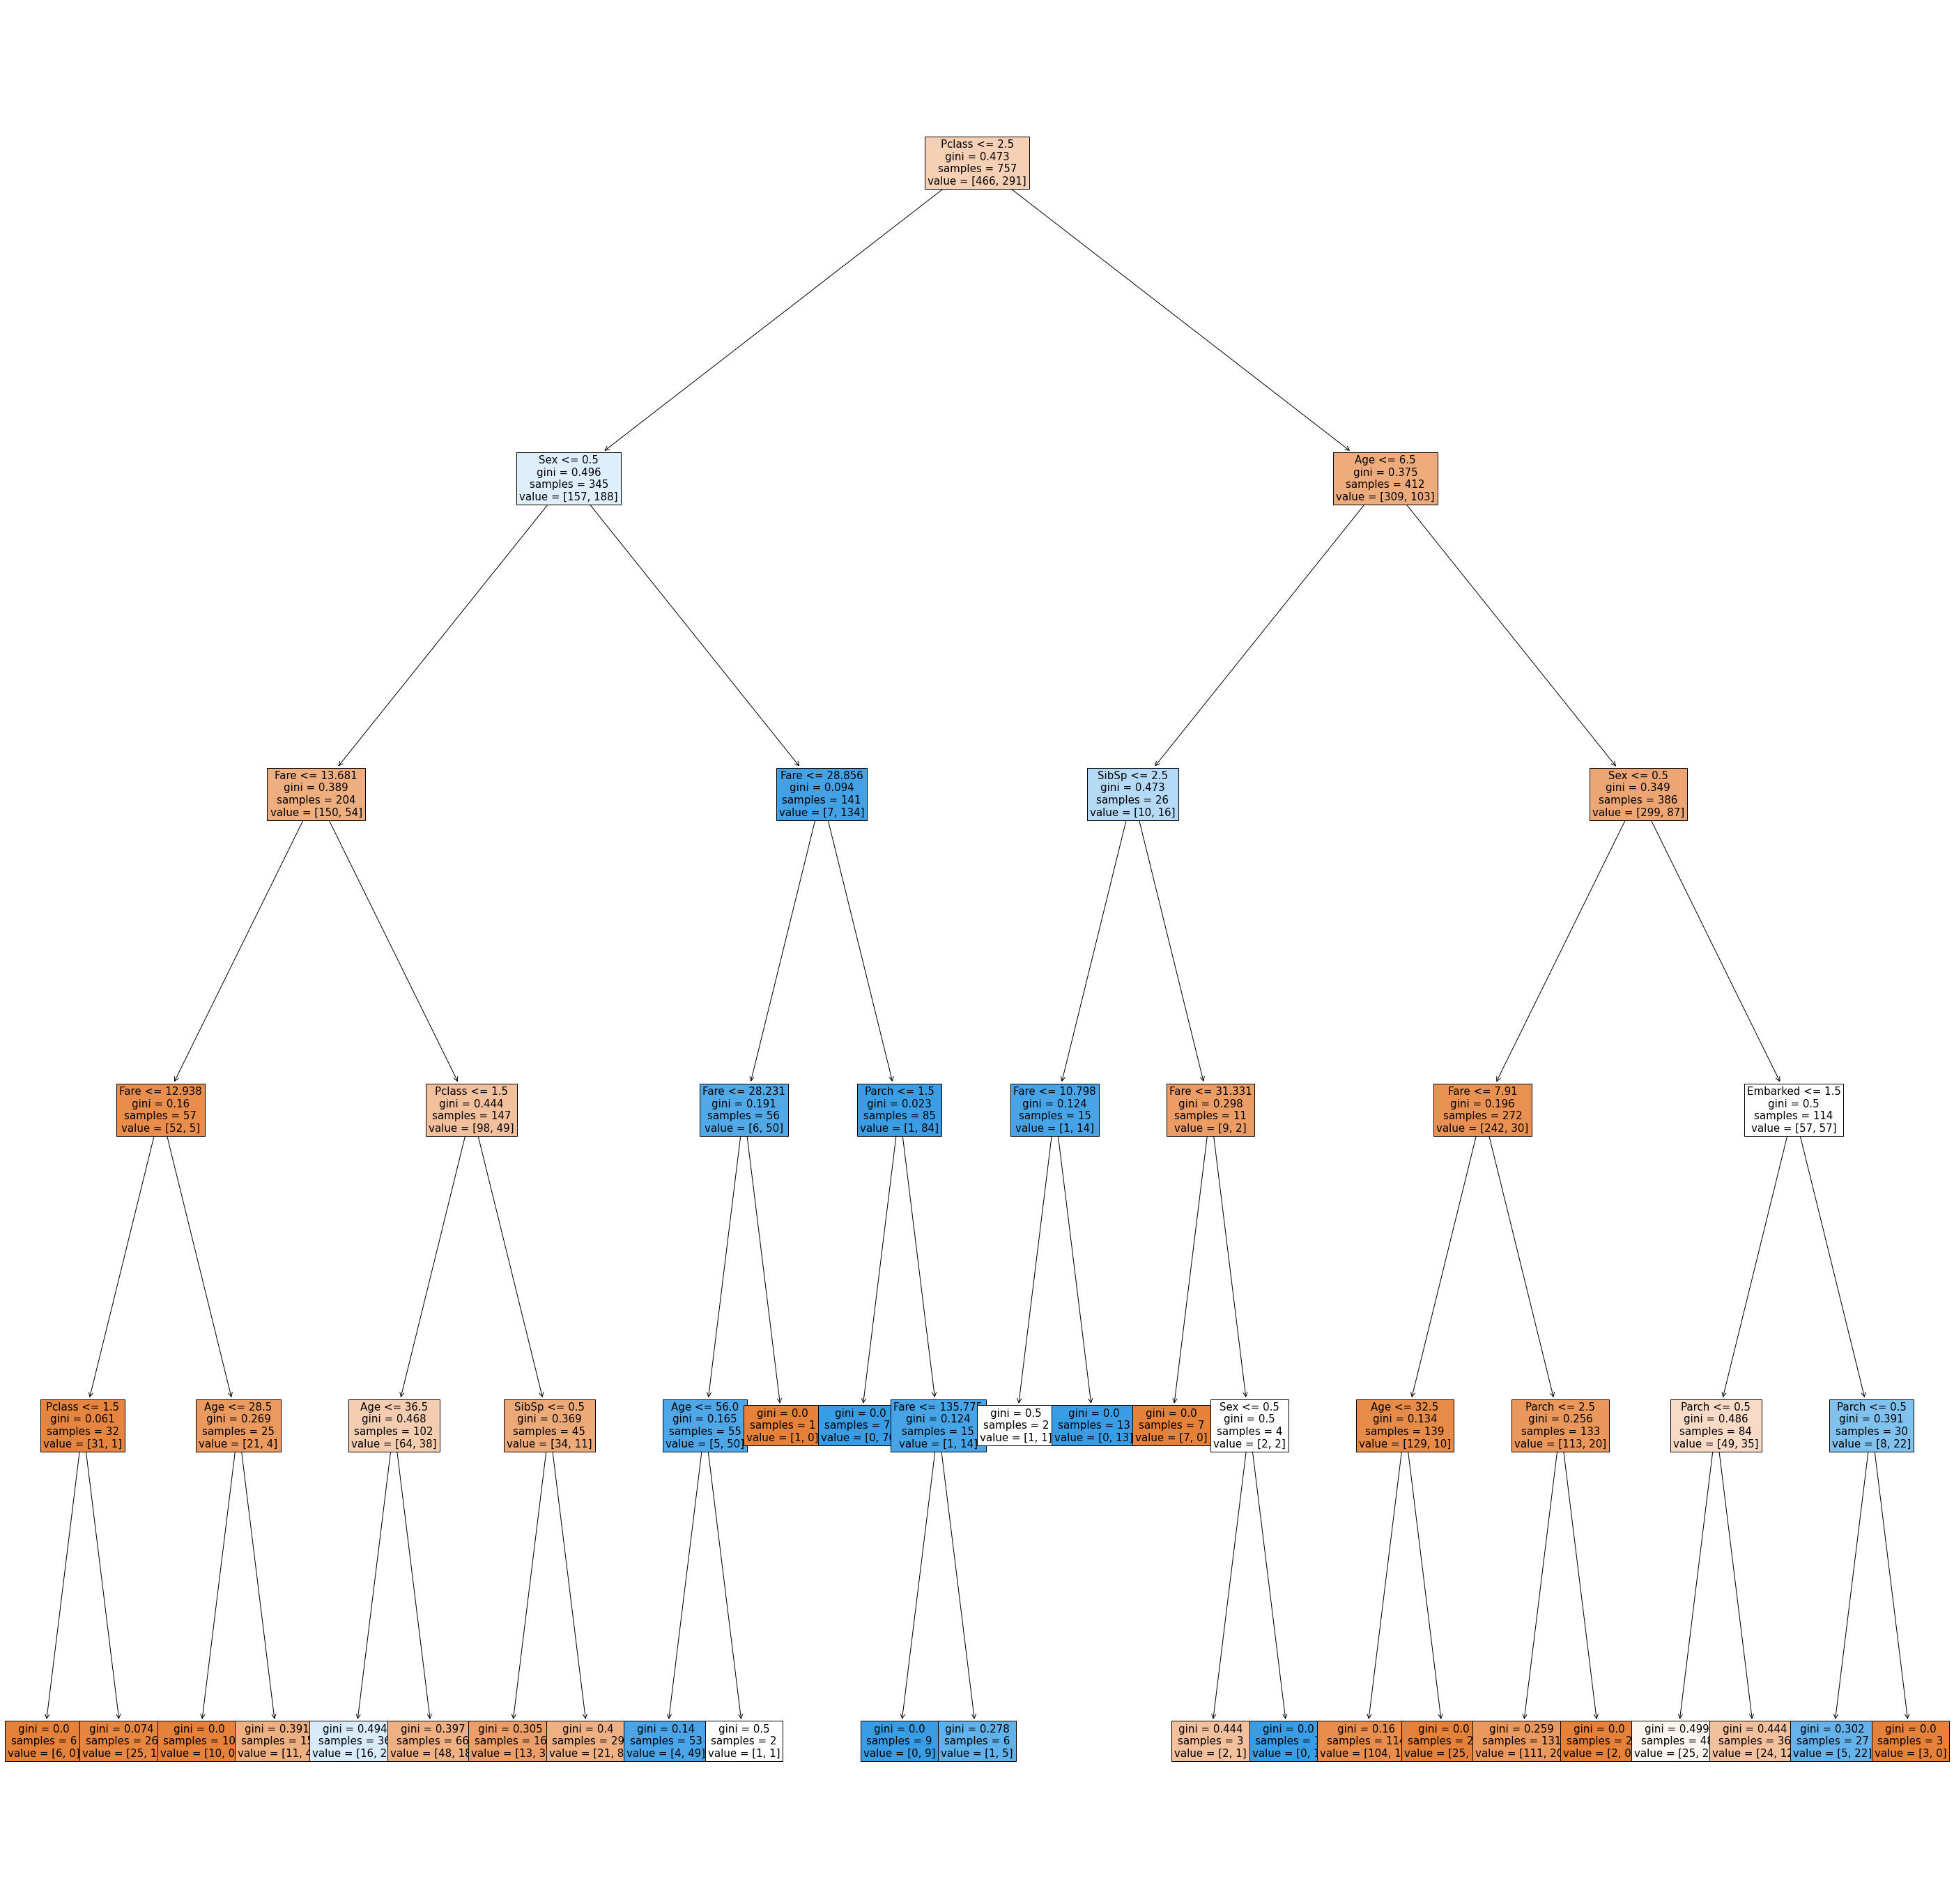

In [402]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
figure = plt.figure(figsize=(50,50))
plot_tree(model, feature_names=train_X.columns, filled=True, fontsize=15)
figure.savefig('bestDT.png')

Task 1.4: FIVE FOLD CROSS VALIDATION ON DECISION TREE

In [407]:
from sklearn.model_selection import cross_val_score
dtModel = model
results = cross_val_score(dtModel, train_X, train_Y, cv=5)
print("Cross validation accuracies: ", results)
print("Accuracy of decision tree model (%): ", sum(results) / 0.05)

Cross validation accuracies:  [0.78289474 0.82236842 0.8013245  0.83443709 0.80794702]
Accuracy of decision tree model (%):  80.97943534332519


Task 1.5.1: LEARN RANDOM FOREST CLASSFIER

In [417]:
from sklearn.ensemble import RandomForestClassifier
classifierObj = RandomForestClassifier()
classifierObj.fit(train_X, train_Y)
print("Train ACC: ", classifierObj.score(train_X, train_Y) * 100)
print("Test ACC: ", classifierObj.score(test_X, test_Y) * 100)


Train ACC:  98.15059445178336
Test ACC:  79.8507462686567


Task 1.5.2: FINE-TUNING RANDOM FOREST CLASSIFIER

In [418]:
def fineTunerRF():
    criterionList = ['gini', 'entropy']
    maxDepthList = [1,2,3,4,5,6,7,8,9,10,None]
    minSamplesList = [4,3,2]
    maxFeatureList = [0.5,0.6,0.7,0.8,0.9,1.0,None, 'auto', 'sqrt', 'log2']
    estimatorList = [10, 50, 100, 150, 200, 300, 400, 500]
    bestModel = None
    bestScore = 0
    bestHyperParameters = {"n_estimators": None,
                           "criterion": None,
                           "maxDepth": None,
                           "minSampleSplit": None,
                           "maxFeature": None
                          }
    
    for criteria in criterionList:
        for maxDepth in maxDepthList:
            for minSamples in minSamplesList:
                for maxFeatures in maxFeatureList:
                    for nEstimator in estimatorList:
                        model = RandomForestClassifier(criterion=criteria,
                                                      max_depth=maxDepth,
                                                      min_samples_split=minSamples,
                                                      max_features=maxFeatures,
                                                      n_estimators=nEstimator)
                        model.fit(train_X, train_Y)
                        score = model.score(test_X, test_Y)
                        if score > bestScore:
                            bestModel = model
                            bestScore = score
                            bestHyperParameters["n_estimators"] = nEstimator
                            bestHyperParameters["criterion"] = criteria
                            bestHyperParameters["maxDepth"] = maxDepth
                            bestHyperParameters["minSampleSplit"] = minSamples
                            bestHyperParameters["maxFeature"] = maxFeatures

    print ("Best Score: ", bestScore * 100)
    print ("Best Params: ", bestHyperParameters)
    return bestModel, bestHyperParameters, bestScore

In [372]:
fineTunerRF()

Best Score:  83.5820895522388
Best Params:  {'n_estimators': 10, 'criterion': 'gini', 'maxDepth': 8, 'minSampleSplit': 2, 'maxFeature': 'auto'}


(RandomForestClassifier(max_depth=8, n_estimators=10),
 {'n_estimators': 10,
  'criterion': 'gini',
  'maxDepth': 8,
  'minSampleSplit': 2,
  'maxFeature': 'auto'},
 0.835820895522388)

In [419]:
# reinitializing best model to save fineTuning time
rfModel = RandomForestClassifier(criterion='gini',
                               max_depth=8,
                               min_samples_split=2,
                               max_features='auto',
                               n_estimators=10)
rfModel.fit(train_X, train_Y)
score = model.score(test_X, test_Y)
print(score)




0.835820895522388


Task 1.5.3: FIVE FOLD CROSS VALIDATION ON RANDOM FOREST CLASSFIER

In [466]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(rfModel, train_X, train_Y, cv=5)
print("Cross validation accuracies: ", results)
print("Accuracy of random forest model (%): ", sum(results) / 0.05)

Cross validation accuracies:  [0.80263158 0.81578947 0.86754967 0.88741722 0.8013245 ]
Accuracy of random forest model (%):  83.49424886720111


Task 1.6: QUESTION

Q:Which algorithm is better, Decision Tree or Random Forest?

Ans: Fine tuned Random Forest works better than Fine tuned Decision Tree by approximately 2.5%


Task 1.7: QUESTION

Q: What are your observations and conclusions from the algorithm comparison and
analysis?

Ans: My observation is that random forest classifier performed better than decision tree. This is because random forest classifier is capable of building complex decision boundaries in comparison with decision tree classifier. I also believe that this difference in performance will widen more if the dataset is huge in terms of feature dimensions.